In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [7]:
#Creating a DataFrame of iris dataset

import pandas as pd
data = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width': iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width': iris.data[:,3],
    'species': iris.target

})

In [8]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 19]])

In [23]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9777777777777777

In [24]:
#Making predictions for a single item

clf.predict([[3,5,4,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [25]:
#Making predictions for a single item

clf.predict([[7,2,6,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [26]:
#Finding important features

import pandas as pd

feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal width (cm)     0.464878
petal length (cm)    0.431148
sepal length (cm)    0.076550
sepal width (cm)     0.027424
dtype: float64

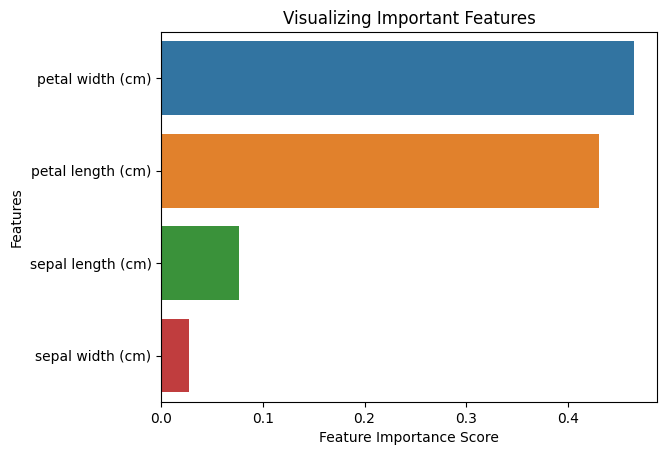

In [27]:
#Visualizing Feature Importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()



In [28]:
#Generating model on selected features

#From the above graph we can understand that petal width and petal length are th e 2 most important features, so we will build a model based on those 2 features alone

X = data[['petal width', 'petal length']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [30]:
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

In [32]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9777777777777777